In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
n_observations = 10000
data = np.random.normal(0,1,size=(n_observations))
percentiles = np.percentile(data, [2.5,97.5])
mask = (data > percentiles[0])&(data < percentiles[1])
np.sum(mask)/n_observations

0.95

Explanation of the code:
- n_observations = 10000

Here you set the number of random observations you want to generate to 10000.

- data = np.random.normal(0,1,size=(n_observations))

Here you generate 10000 (set in step 1) random numbers from a normal distribution with a mean of 0 and a standard deviation of 1.

- percentiles = np.percentile(data, [2.5,97.5])

Here you calculate the 2.5th and the 97.5th percentiles of this data (corresponding to the lower and upper bounds of the 95% confidence interval).

- mask = (data > percentiles[0])&(data < percentiles[1])

Here you create a boolean mask which checks which observations are between the 2.5th and the 97.5th percentiles. You get True for observations that fall in the interval, and False for observations outside of it.

- np.sum(mask)/n_observations

Here you count how many True values there are (np.sum(mask)), and divide this by the number of observations. This gives the proportion of data points inside the interval.

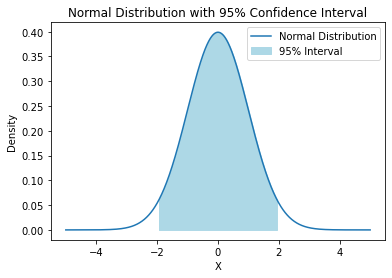

In [4]:
x_values = np.linspace(-5,5,1000)
y_values = norm.pdf(x_values, 0, 1)
plt.plot(x_values, y_values, label="Normal Distribution")
plt.fill_between(x_values, y_values, where=(x_values >= percentiles[0]) & (x_values <= percentiles[1]), color = 'lightblue', label="95% Interval")
plt.title("Normal Distribution with 95% Confidence Interval")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

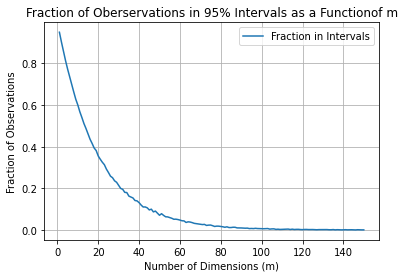

In [5]:
dimensions = range(1,151)
fractions_in_intervals = []
for m in dimensions:
    data = np.random.normal(0, 1, size=(n_observations, m))
    lower_bound, upper_bound = np.percentile(data, [2.5, 97.5], axis=0)
    mask = np.all((data > lower_bound) & (data < upper_bound), axis=1)
    fraction_in_intervals = np.sum(mask) / n_observations
    fractions_in_intervals.append(fraction_in_intervals)
plt.plot(dimensions, fractions_in_intervals, label = "Fraction in Intervals")  
plt.title("Fraction of Oberservations in 95% Intervals as a Functionof m")
plt.xlabel("Number of Dimensions (m)")
plt.ylabel("Fraction of Observations")
plt.grid(True)
plt.legend()
plt.show()




Explanation of the code: 
dimensions = range(1, 151)
Here, dimensions is set to go from 1 up to 150. This means the code will perform calculations for each dimension from 1 through 150.

fractions_in_intervals = []
An empty list called fractions_in_intervals is created to keep track of results for each dimension. Specifically, it will store the fraction of data points that fall within a certain range.

for m in dimensions:
This loop goes through each value of m in the range of 1 to 150. Each value of m represents a different number of features or columns in the data.

data = np.random.normal(0, 1, size=(n_observations, m))
This line creates a 2D array called data with n_observations rows and m columns.
The values in data are drawn from a standard normal distribution (mean of 0 and standard deviation of 1).
For example, if m = 10 and n_observations = 1000, the resulting array will have 1000 rows and 10 columns.

lower_bound, upper_bound = np.percentile(data, [2.5, 97.5], axis=0)
This calculates the 2.5th and 97.5th percentiles for each column of data.

lower_bound and upper_bound are arrays containing the boundary values for each column.
The axis=0 ensures that the calculation is performed separately for each feature (column).

mask = np.all((data > lower_bound) & (data < upper_bound), axis=1)
This line creates a boolean mask that checks whether each data point is between the lower_bound and upper_bound values for all columns.
The result is a 1D array (mask) where each element is True if all values in a row are within the specified range, and False otherwise.

fraction_in_intervals = np.sum(mask) / n_observations
np.sum(mask) counts how many rows have all their values within the specified interval.
This count is divided by the total number of observations to get the fraction of data points that fall inside the interval.

fractions_in_intervals.append(fraction_in_intervals)
The fraction calculated above is added to the list fractions_in_intervals.
After the loop completes, this list will have 150 values, each representing the fraction of data points that were within the confidence interval for a given dimension (m).


Interpretation of graph: 
The graph shows that as the number of dimensions (m) increases, the fraction of observations within a 95% confidence interval drops sharply. At m=1, about 95% of observations fall within the interval, but this fraction rapidly decreases as m grows.
By the time m reaches 150, nearly no observations satisfy the interval for all dimensions. This illustrates the curse of dimensionality, where higher dimensions cause data to become sparse, making it harder for observations to stay within expected bounds. 